找到音频文件共 4 个: ['Taylor Swift - Cruel Summer.mp3', 'taylor swift-welcome to new york.mp3', 'taylor swift-last christmas.mp3', 'Taylor Swift - Love Story.mp3']

音频时长统计:
                               filename  duration_sec
0       Taylor Swift - Cruel Summer.mp3    178.426667
1  taylor swift-welcome to new york.mp3    212.600000
2       taylor swift-last christmas.mp3    219.136000
3         Taylor Swift - Love Story.mp3    235.766644


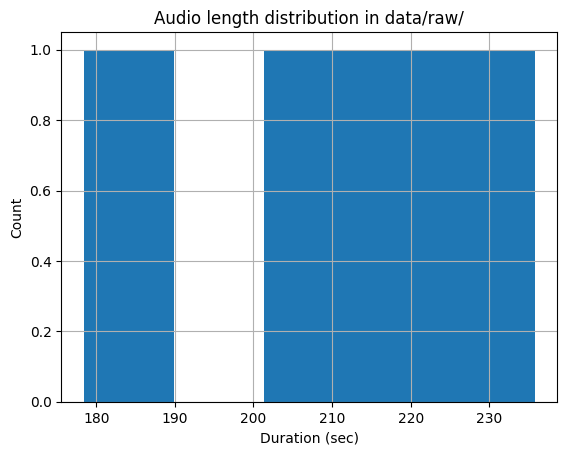


chorus_labels.csv:
                               filename  start_sec  end_sec
0       Taylor Swift - Cruel Summer.mp3       75.0     98.0
1         Taylor Swift - Love Story.mp3       64.0     81.0
2         Taylor Swift - Love Story.mp3      116.0    133.0
3  taylor swift-welcome to new york.mp3       47.0     60.0
4       taylor swift-last christmas.mp3       87.0    104.0

副歌区间长度分布:
count     5.000000
mean     17.400000
std       3.577709
min      13.000000
25%      17.000000
50%      17.000000
75%      17.000000
max      23.000000
Name: length, dtype: float64

[提示 - 更多数据]
- 如果想要“专家级”副歌检测,
  需要收集更多风格, 更长时长, 并在 chorus_labels.csv 中仔细标注副歌区间
- 若只有少量文件, 强烈建议扩大数据集


探索完成.


In [3]:
# 1_data_exploration.ipynb
# ---------------------------
# 改进要点:
# 1) 与原逻辑相同, 但提示你可添加更多歌曲/风格 => 数据量足够才能让副歌检测更加泛化
# 2) 如果 chorus_labels.csv 很少, 需要更多人工标注

import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt

AUDIO_FOLDER = "../data/raw/"

audio_files = [f for f in os.listdir(AUDIO_FOLDER) if (f.endswith(".mp3") or f.endswith(".wav"))]
print("找到音频文件共", len(audio_files), "个:", audio_files)

durations = []
for afile in audio_files:
    path = os.path.join(AUDIO_FOLDER, afile)
    y, sr = librosa.load(path, sr=None)  # 不重采样
    duration_sec = len(y)/sr
    durations.append((afile, duration_sec))

df = pd.DataFrame(durations, columns=["filename","duration_sec"])
print("\n音频时长统计:")
print(df)

# 可视化:
df["duration_sec"].hist(bins=5)
plt.xlabel("Duration (sec)")
plt.ylabel("Count")
plt.title("Audio length distribution in data/raw/")
plt.show()

# (可选) 查看 chorus_labels.csv
label_csv = "chorus_labels.csv"
if os.path.exists(label_csv):
    df_label = pd.read_csv(label_csv)
    print("\nchorus_labels.csv:")
    print(df_label.head())
    df_label["length"] = df_label["end_sec"] - df_label["start_sec"]
    print("\n副歌区间长度分布:")
    print(df_label["length"].describe())

print("""
[提示 - 更多数据]
- 如果想要“专家级”副歌检测,
  需要收集更多风格, 更长时长, 并在 chorus_labels.csv 中仔细标注副歌区间
- 若只有少量文件, 强烈建议扩大数据集
""")

print("\n探索完成.")